# To train your own digit classifier using CNN and predict the digits
Problem Statement NUM:5

In order to develop an CNN model for digit prediction i have trained the model using MNIST data set 
and by using which have achived the predictions

In [14]:
#importing all the required libraries
#Dense,Dropout,Flatten, conv2d Maxpooling these all are the layers used in CNN to create a neural network
#cv2 used to deal with problems regarding computer vision
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.datasets import mnist

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #loading the data and spliting it into train/test

In [16]:
print("Shape of Training Samples\nX_train:{}\nY_train:{}".format(X_train.shape,y_train.shape)) #geting details of img shape
print("Shape of Testing Samples\nX_test:{}\nY_test:{}".format(X_test.shape,y_test.shape))

Shape of Training Samples
X_train:(60000, 28, 28)
Y_train:(60000,)
Shape of Testing Samples
X_test:(10000, 28, 28)
Y_test:(10000,)


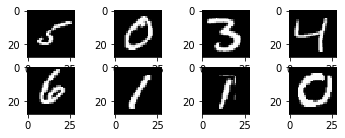

In [17]:
#lets see the sample images from the training data
#can do this by using matplotlib
#displaying few images from train data


plt.subplot(441)
plt.imshow(X_train[11],cmap='gray')
plt.subplot(442)
plt.imshow(X_train[1],cmap='gray')
plt.subplot(443)
plt.imshow(X_train[12],cmap='gray')
plt.subplot(444)
plt.imshow(X_train[2],cmap='gray')
plt.subplot(445)
plt.imshow(X_train[13],cmap='gray')
plt.subplot(446)
plt.imshow(X_train[3],cmap='gray')
plt.subplot(447)
plt.imshow(X_train[67],cmap='gray')
plt.subplot(448)
plt.imshow(X_train[121],cmap='gray')
plt.show()

In [5]:
#as its 3 dimentional lets reshape it 

X_train = X_train.reshape((X_train.shape[0],28,28,1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0],28,28,1)).astype('float32')

In [6]:
#normalizing the inputs 
X_train = X_train / 255
X_test = X_test / 255

In [7]:
#output variables as it has multiple classes in them we perform one hot enconding and this can also be done by using np_utils
#to convert into categories

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
#creating the model with layers

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
#compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
#fiting model for data

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10, batch_size=200)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 54s 895us/step - loss: 0.2528 - acc: 0.9276 - val_loss: 0.0795 - val_acc: 0.9758
Epoch 2/10
60000/60000 [==============================] - 54s 892us/step - loss: 0.0747 - acc: 0.9777 - val_loss: 0.0525 - val_acc: 0.9841
Epoch 3/10
60000/60000 [==============================] - 53s 885us/step - loss: 0.0522 - acc: 0.9847 - val_loss: 0.0422 - val_acc: 0.9858
Epoch 4/10
60000/60000 [==============================] - 52s 867us/step - loss: 0.0415 - acc: 0.9869 - val_loss: 0.0421 - val_acc: 0.9858
Epoch 5/10
60000/60000 [==============================] - 52s 866us/step - loss: 0.0347 - acc: 0.9890 - val_loss: 0.0411 - val_acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 52s 866us/step - loss: 0.0283 - acc: 0.9909 - val_loss: 0.0330 - val_acc: 0.9895
Epoch 7/10
60000/60000




*_*_*_*_*_Result Image_*_*_*_*_*


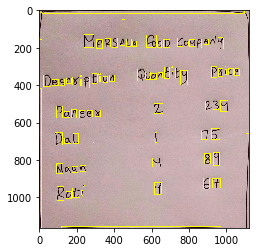

In [11]:
#here i am reading an displaying the image with some hightlightings on it to identify the contents in them

image = cv2.imread('C:/Users/shiva/python programs/Basic projects/Thirdleap/Assignment/5.jpg')
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey, 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
extract_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(255,255,0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the extracted digit to the list extracted digits
    extract_digits.append(padded_digit)
print("\n\n\n*_*_*_*_*_Result Image_*_*_*_*_*")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(extract_digits)

Finally making prediction on the new data 
# here i request you to plz focus on the NUMBER predictions then the letters

*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




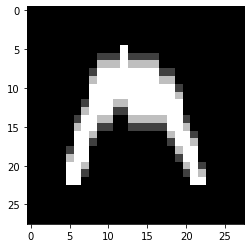



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




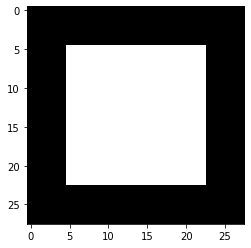



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




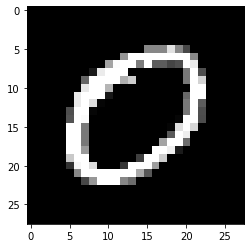



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




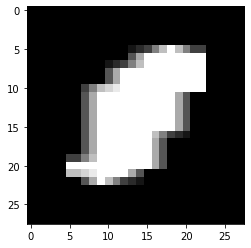



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




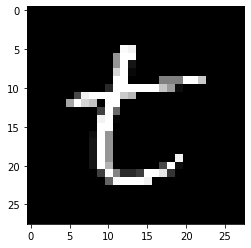



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




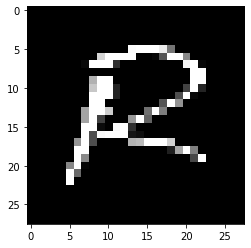



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




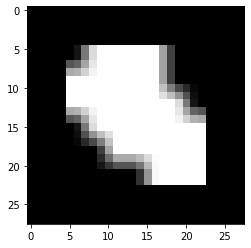



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




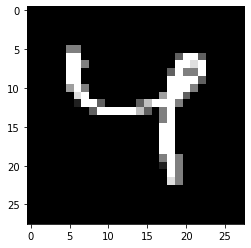



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




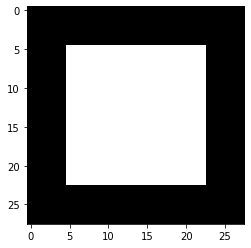



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




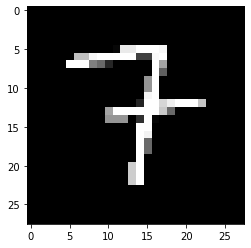



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




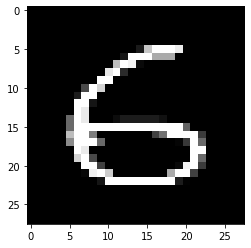



Final Output: 6

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




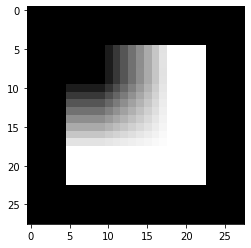



Final Output: 2

Prediction (Softmax) from the neural network:

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




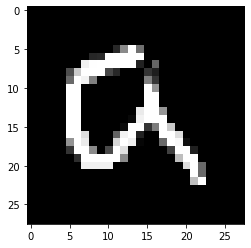



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




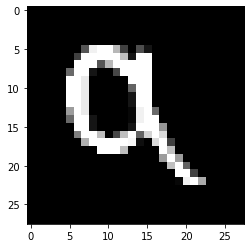



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




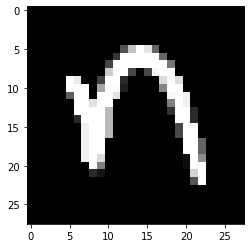



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




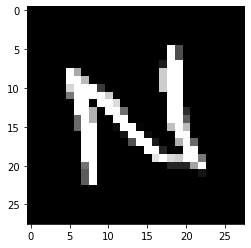



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




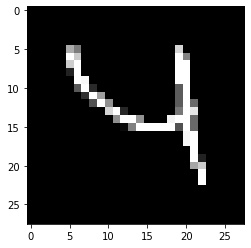



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




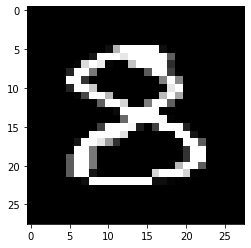



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




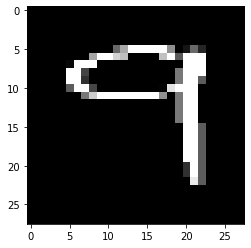



Final Output: 7

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




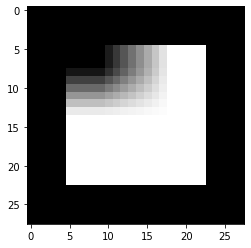



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




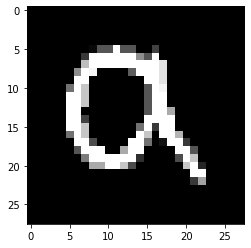



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




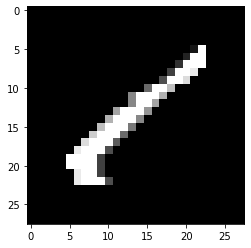



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




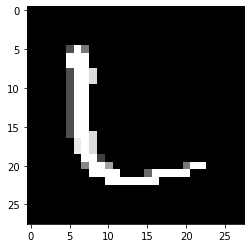



Final Output: 6

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




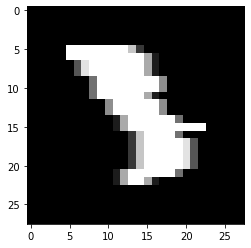



Final Output: 3

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




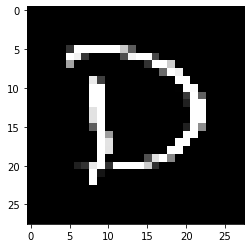



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




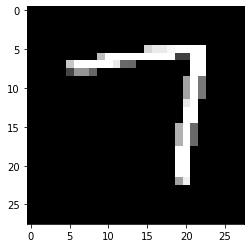



Final Output: 7

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




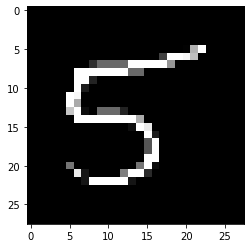



Final Output: 5

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




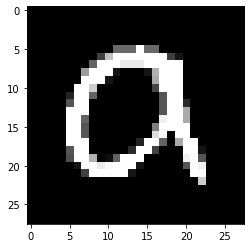



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




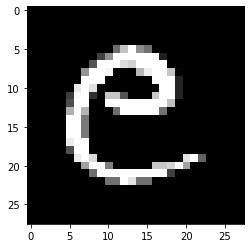



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




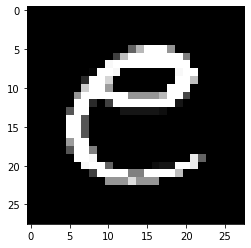



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




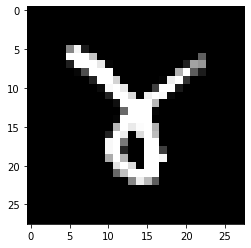



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




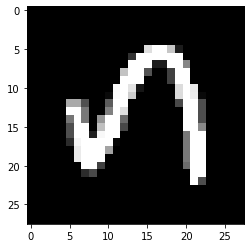



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




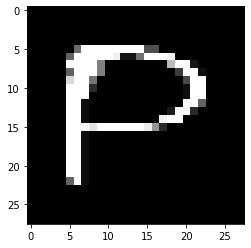



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




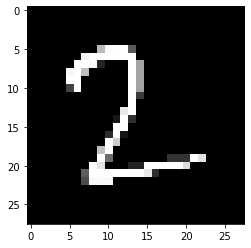



Final Output: 2

Prediction (Softmax) from the neural network:

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




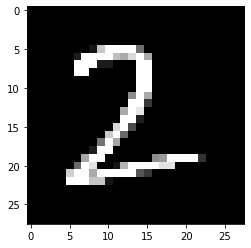



Final Output: 2

Prediction (Softmax) from the neural network:

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




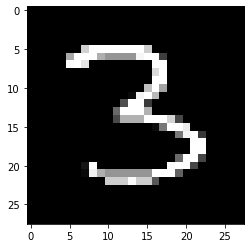



Final Output: 3

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




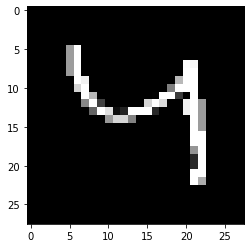



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




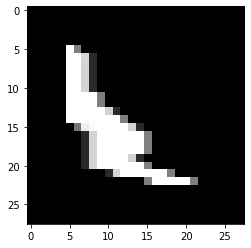



Final Output: 6

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




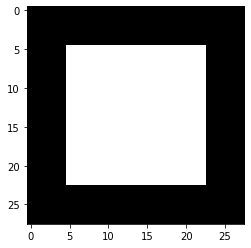



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




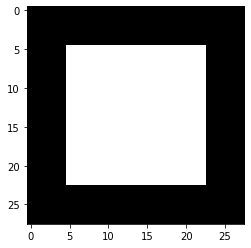



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




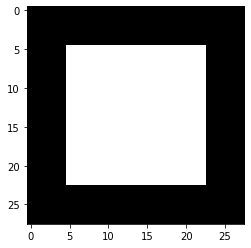



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




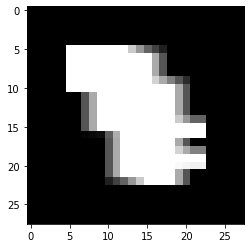



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




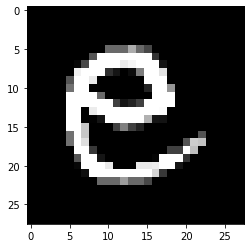



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 2.1241558e-33]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




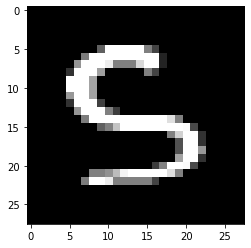



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




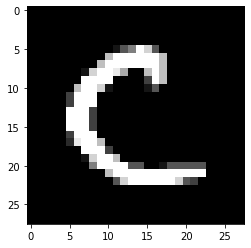



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




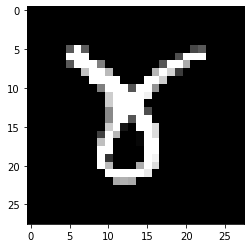



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




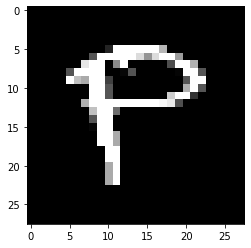



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




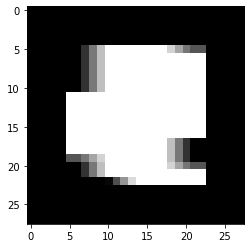



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.3652876e-13
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




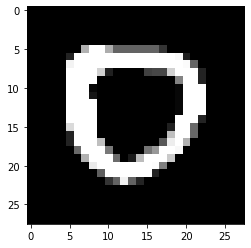



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




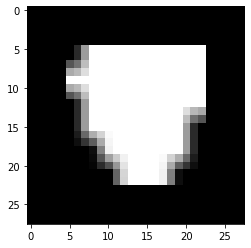



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




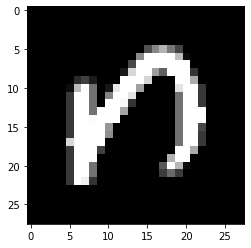



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




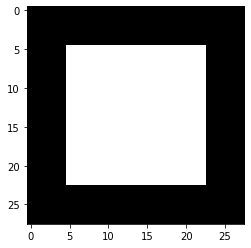



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




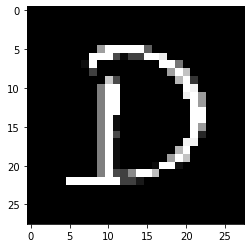



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




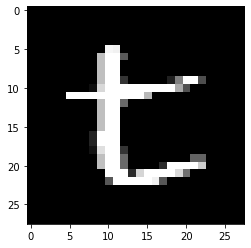



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




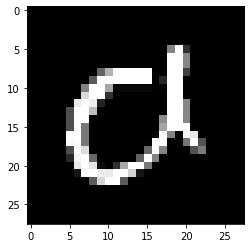



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




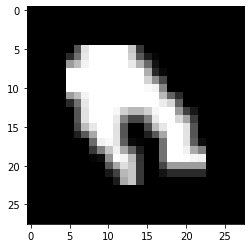



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




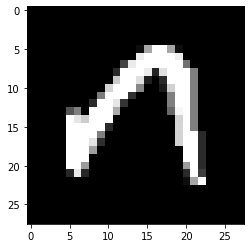



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




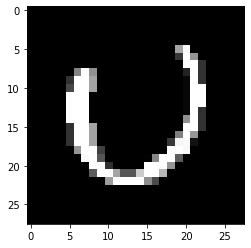



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




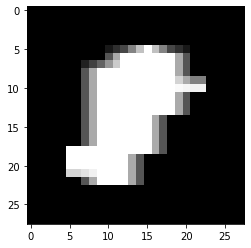



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




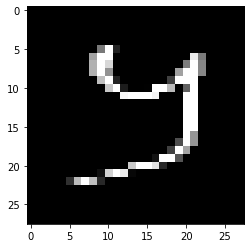



Final Output: 7

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




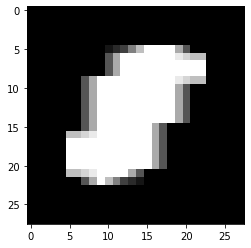



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




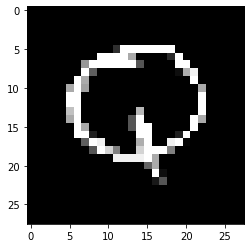



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




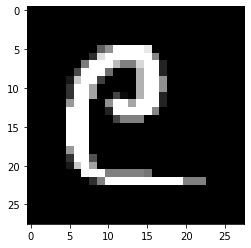



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




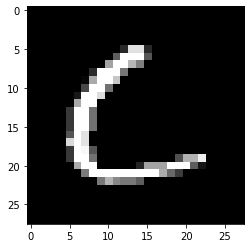



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




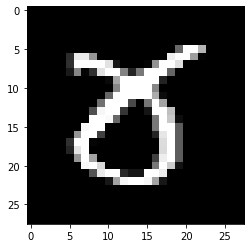



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




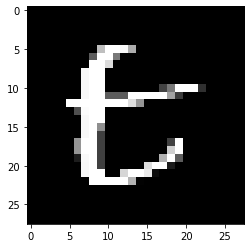



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




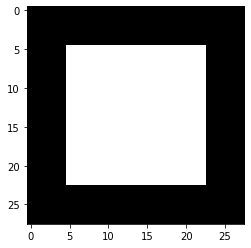



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




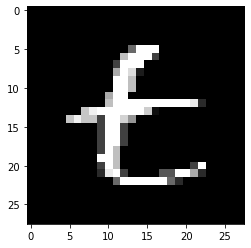



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




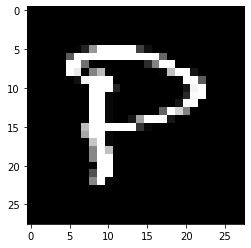



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




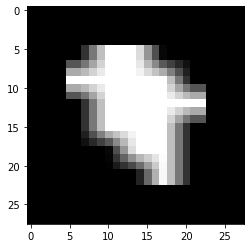



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




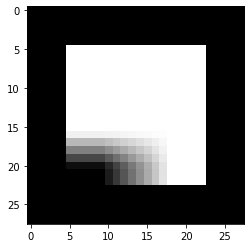



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




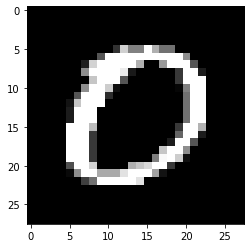



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




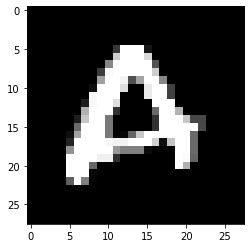



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




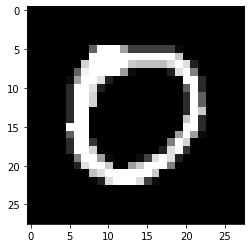



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




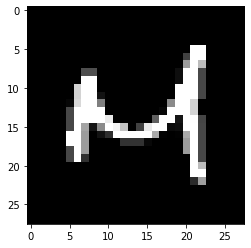



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




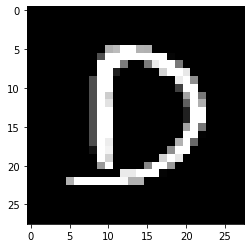



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




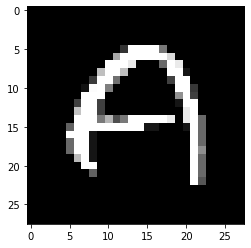



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




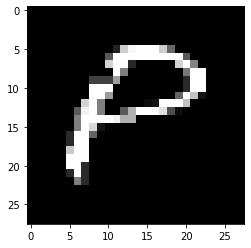



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




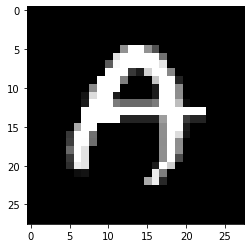



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




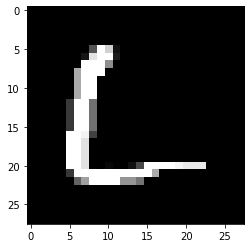



Final Output: 6

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




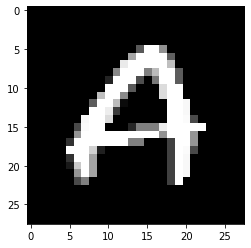



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




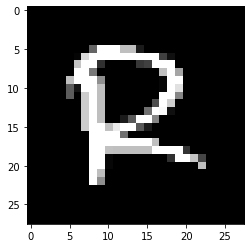



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




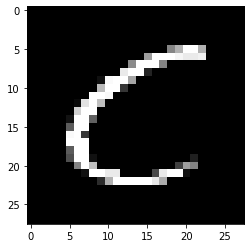



Final Output: 6

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




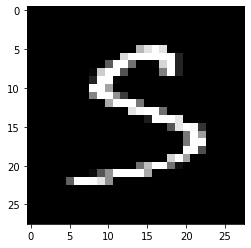



Final Output: 5

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




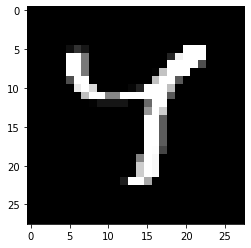



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0.0000000e+00 1.2462922e-15 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




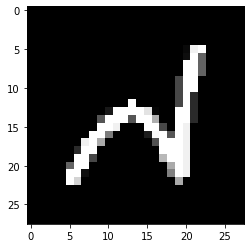



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




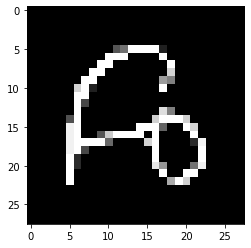



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




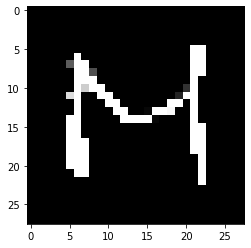



Final Output: 4

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




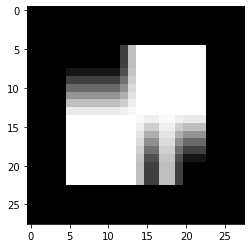



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




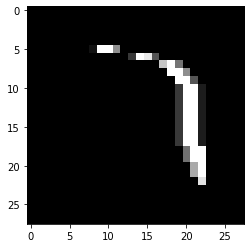



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




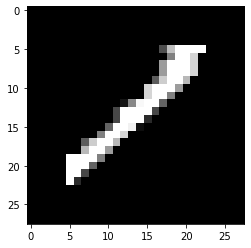



Final Output: 1

Prediction (Softmax) from the neural network:

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------


*_**_**_**_**_**_**_**_**_**_*
=========PREDICTION============ 




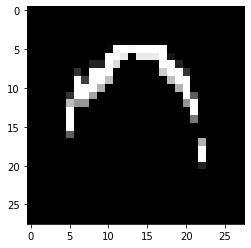



Final Output: 9

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------




In [12]:

for digit in extract_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print (("*_*")*10)
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")

# Thank you !